Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


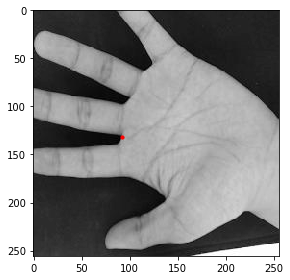

In [1]:
from skimage import io
import numpy as np
import Hourglass as HG
import matplotlib.pyplot as plt

model=HG.model(input_shape=(256,256,1),labels=20,nstack=6,level=4,filters=256)
model.load_weights('CNN_Hourglass256.h5')
img=io.imread('img.jpg')

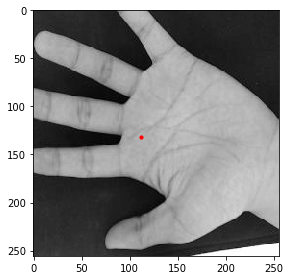

In [4]:
prediction=model.predict(img.reshape(1, 256, 256, 1))[-1][0]
x = []
y = []
for i in range(prediction.shape[2]):
    xt = int((np.argmax(prediction[:, :, i]) % 64 / 64) * 256)
    yt = int(int(np.argmax(prediction[:, :, i]) / 64) / 64 * 256)
    x.append(xt)
    y.append(yt)
life_x = x[0:5]
life_y = y[0:5]
int_x = x[5:10]
int_y = y[5:10]
aff_x = x[10:15]
aff_y = y[10:15]
finger_x = x[15:20]
finger_y = y[15:20]
life_points = []
int_points = []
aff_points = []
finger_points = []
for i in range(5):
    life_points.append([life_x[i], life_y[i]])
    int_points.append([int_x[i], int_y[i]])
    aff_points.append([aff_x[i], aff_y[i]])
    finger_points.append([finger_x[i], finger_y[i]])
io.imshow(img)
plt.scatter(aff_x[-1],aff_y[-1],c='r',s=10)
plt.show()